In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [111]:
X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                         n_classes=2,n_clusters_per_class=1,random_state=41,
                         hypercube=False,class_sep=10)

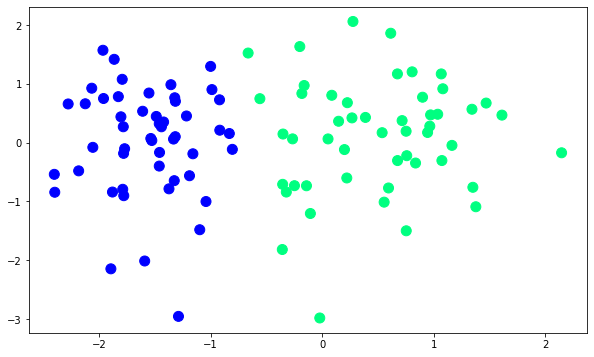

In [112]:
"""
In the scatter plot, the blue represents 0 and green represents 1
"""
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap = 'winter',s = 100)

In [113]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='none',solver='sag',max_iter=2500)
log_reg.fit(X,y)

LogisticRegression(max_iter=2500, penalty='none', solver='sag')

In [114]:
print(log_reg.coef_)
print(log_reg.intercept_)

[[28.72365248  2.53438523]]
[19.15724395]


In [115]:
m = -(log_reg.coef_[0][0]/log_reg.coef_[0][1])
b = -(log_reg.intercept_/log_reg.coef_[0][1])

In [116]:
x_input_l = np.linspace(-3,3,100)
y_output_l = m*x_input_l + b

(-4.0, 3.0)

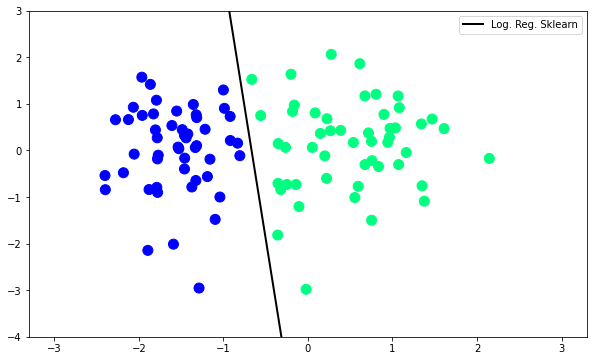

In [117]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c = y,cmap='winter',s = 100)
plt.plot(x_input_l,y_output_l,color = 'black',linewidth = 2,label = "Log. Reg. Sklearn")
plt.legend()
plt.ylim(-4,3)

In [118]:
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

In [155]:
def log_reg(X,y):
    X = np.insert(X,0,1,axis = 1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    
    for i in range(2500): 
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + (lr * np.dot((y - y_hat),X))/X.shape[0]
    return weights[0],weights[1:]

In [156]:
intercept_,coef_ = log_reg(X,y)
print(intercept_)
print(coef_)

6.371760288904531
[9.64369151 0.5373282 ]


In [157]:
m = - (coef_[0]/coef_[1])
b = - (intercept_/coef_[1])

In [158]:
print(m,b)

-17.947488230103133 -11.85822800915109


In [159]:
x_input = np.linspace(-3,3,100)
y_output = m*x_input + b

(-4.0, 3.0)

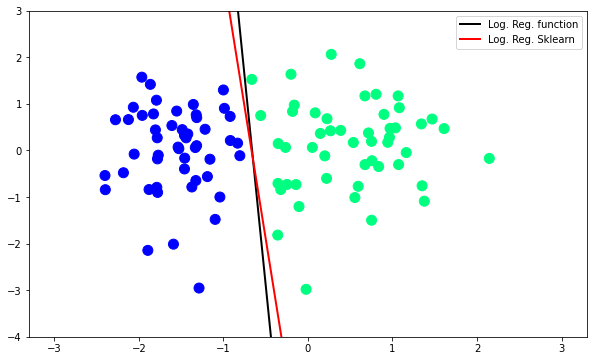

In [160]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c = y,cmap='winter',s = 100)
plt.plot(x_input,y_output,color = 'black',linewidth = 2,label = "Log. Reg. function")
plt.plot(x_input_l,y_output_l,color = 'red',linewidth = 2,label = "Log. Reg. Sklearn")
plt.legend()
plt.ylim(-4,3)

In [161]:
#the more the learning rate and epochs the closer the result in terms of sklearn implementations